## import library

In [2]:
# create jupyter note book
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mtcars = pd.DataFrame()
mtcars = pd.read_csv("./mtcars.csv")

In [3]:
# print head
mtcars.head(3)


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [4]:
# print tail
mtcars.tail(3)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.77,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.78,18.6,1,1,4,2


In [5]:
# print shape
mtcars.shape

#result (num of rows, num of cols/attributes)

(32, 12)

### 이름이 없는 컬럼을 찾아서 적합한 이름으로 변경변경

In [6]:
mtcars.rename(columns={'Unnamed: 0':'model'}, inplace=True)
mtcars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [7]:
#print info
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [8]:
# print dtypes
mtcars.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [9]:
# print describe
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [10]:
# print unique value
mtcars['gear'].unique()

array([4, 3, 5])

In [11]:
# print number of gear unique value
mtcars['gear'].nunique()

3

In [12]:
# print number of transmission unique value
mtcars['am'].nunique()

2

## gear, transmission의 경우의 수 조합
* 3C1 * 2C1 = 6
* 6가지 경우의 수 존재
* 각 조합에 몇개의 차량이 존재하는지 확인

In [13]:
# 4 3 5
x_axis = mtcars['gear'].unique()
x_axis.sort()
print(x_axis)
# 1 0
y_axis = mtcars['am'].unique()
y_axis.sort()
print(y_axis)

[3 4 5]
[0 1]


# Gear, Transmission 의 경우의 수 조합별 차량의 개수 막대 그래프
## crosstab method 를 사용하지 않는 방법
- 'geer', 'am' attribute의 unique 값들을 순회하여 조합 값과 일치하는 데이터를 갖고 있는 행의 개수를 확보합니다.
- 조합 값을 x 축으로, 그 조합에 해당하는 데이터의 개수를 y 축으로 하여 그래프를 완성합니다.

<BarContainer object of 6 artists>

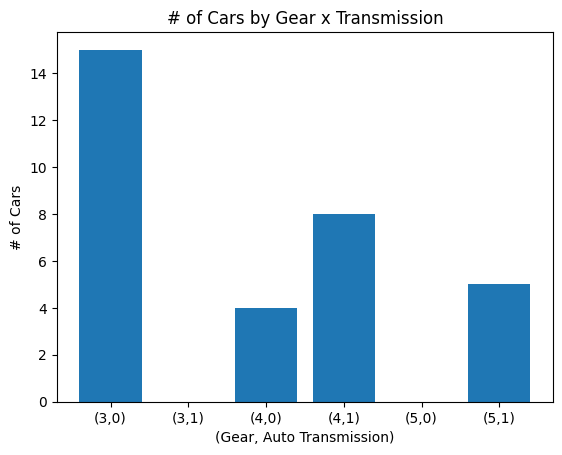

In [14]:
table_x = []
table_y = []
for x in x_axis:
    for y in y_axis:
        count_rows = len(mtcars[(mtcars['gear'] == x) & (mtcars['am'] == y)])
        table_x.append(f'({x},{y})')
        table_y.append(count_rows)

plt.title('# of Cars by Gear x Transmission')
plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars')
plt.bar(table_x, table_y)

## crosstab method 를 사용하는 방법
* pandas의 crosstab 메소드를 사용합니다.
* mtcars dataframe의 'gear', 'am' 컬럼을 인자로 넣어 해당 컬럼들의 조합으로 이루어진 데이터 프레임을 반환받습니다.
* dataframe 이 제공하는 차트 메소드를 사용합니다

<Axes: xlabel='gear'>

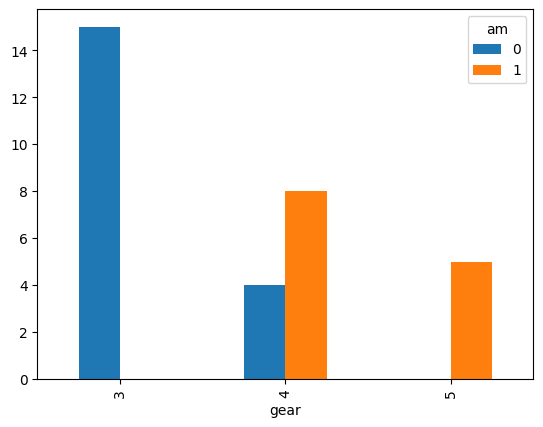

In [15]:
cross = pd.crosstab(mtcars['gear'], mtcars['am'])
cross.plot.bar()

In [16]:
for i in cross.items():
    print(i)

(0, gear
3    15
4     4
5     0
Name: 0, dtype: int64)
(1, gear
3    0
4    8
5    5
Name: 1, dtype: int64)


## 데이터셋에 포함된 모든 features의 히스토그램 그리기

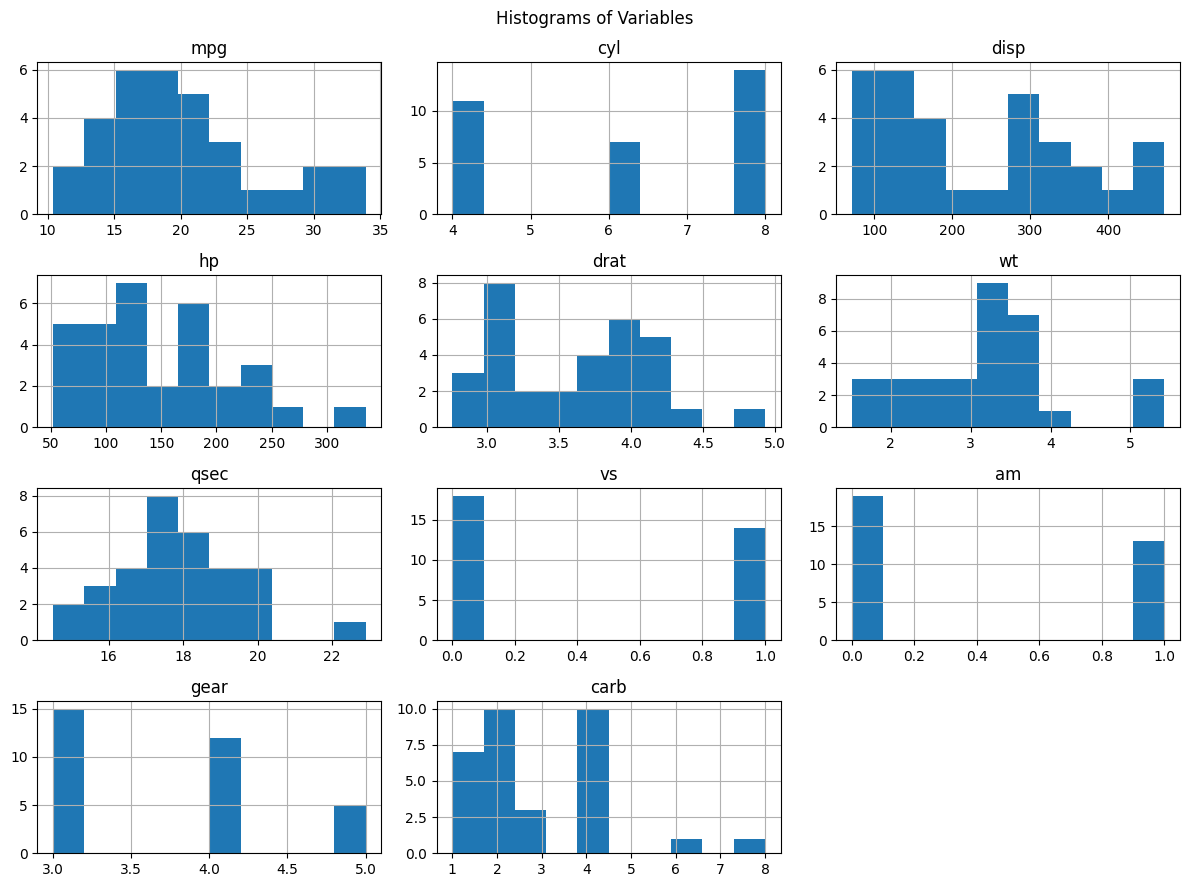

In [17]:
from matplotlib.pyplot import grid

dropped_mtcars = mtcars.drop(columns=['model'])
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 9))
for ax, col in zip(axes.flatten(), dropped_mtcars.columns):
    ax.hist(dropped_mtcars[col], bins=10)
    ax.set_title(col)
    ax.grid()

fig.delaxes(axes.flatten()[11])
fig.suptitle("Histograms of Variables")
plt.tight_layout()
plt.show()


## Cylinder vs Horse Power scatter chart

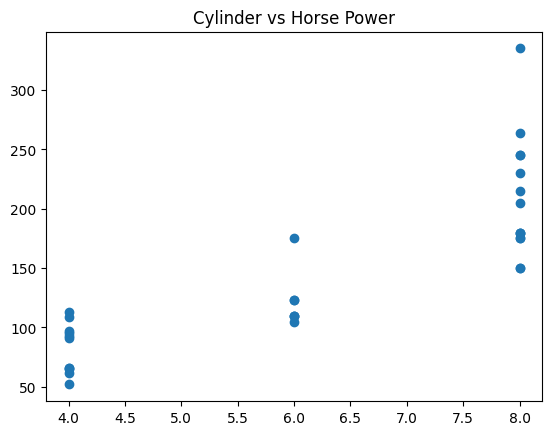

In [18]:
scatter_x, scatter_y = mtcars['cyl'], mtcars['hp']
plt.title("Cylinder vs Horse Power")
plt.scatter(scatter_x, scatter_y)

## MPG vs Horse Power scatter chart

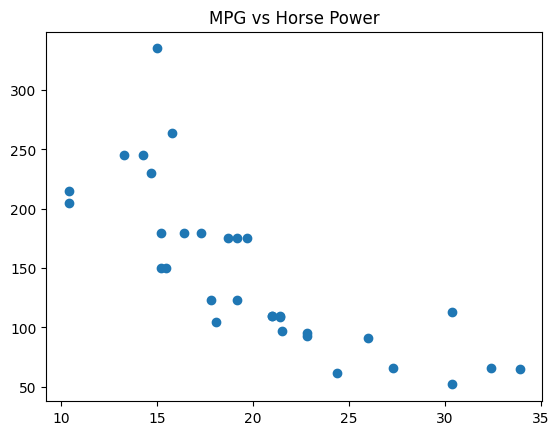

In [19]:
scatter_x, scatter_y = mtcars['mpg'], mtcars['hp']
plt.title("MPG vs Horse Power")
plt.scatter(scatter_x, scatter_y)

## 각 변수들의 상관 관계를 알아보기 위한 상관계수 표

<Axes: >

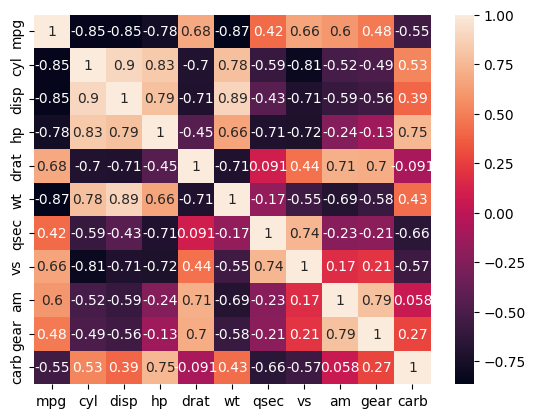

In [20]:
dropped_mtcars = mtcars.drop(columns=['model'])
a = dropped_mtcars.corr()
sns.heatmap(a, annot=True)

## 팀 활동 요구사항
1. 이런 데이터셋을 분석해서 얻을 수 있는 경제적 가치는 무엇일까요? 어떤 비즈니스 상황에서 이런 데이터셋을 분석해서 어떤 경제적 가치를 얻을 수 있을까요?

2. 변수들 간의 상관 관계가 높은 조합을 임의로 2개 선택해서 해당 데이터 간의 상관 관계를 그래프로 그리고 어떤 결론을 내릴 수 있는지를 토의하세요.

### 사전 지식
데이터셋의 features에 대한 설명은 다음과 같습니다.<br>
mpg  = Miles/(US) gallon                        | 연비<br> 
cyl  = Number of cylinders                      | 실린더의 개수<br>
disp = Displacement (cu.in.)                    | 배기량<br>
hp   = Gross horsepower                         | 마력<br>
drat = Rear axle ratio                          | 기어비, 기어비 큼 저속 높은 토크, 기어비 작음 고속 낮은 토크<br>
wt   = Weight (lb/1000)                         | 무게<br>
qsec = ¼ mile time                              | 해당 속도까지 시간<br>
vs   = V/S                                      | V 형 엔진, S (직렬)엔진<br>
am   = Transmission (0 = automatic, 1 = manual) | 자동, 수동 변속기<br>
gear = Number of forward gears                  |  <br>
carb = Number of carburetors                    | 기화기<br>

성능 : mpg hp qsec<br>
구조 :cyl disp drat wt vs	am gear carb

* Answer 1

경제저 가치<br>
1. 본 데이터는 자동차 모델들의 구조와 성능에 대한 데이터들입니다.
2. 데이터들간의 상관 관계의 정도를 분석할 수 있습니다.
3. 차량에 대한 어떤 요구사항 혹은 문제를 해결하기 위해서 관계가 있는 다른 요소들을 활용할 수 있습니다.
4. 요구사항 혹은 문제를 해결하는 것은 금전적 가치가 있습니다. 데이터 셋을 분석하는데 들이는 비용보다 더 크다면 마땅히 수행해야합니다.

비즈니스 상황<br>
1. 자동차 회사는 자동차 성능중 hp가 높은 자동차를 생산하고자 한다. 왜냐하면 고객들이 높은 마력의 차를 원하기 때문이다.
2. 자동차 회사는 자동차 성능중 mpg가 높은 자동차를 생산하고자 한다. 왜냐하면 고객들이 높은 연비의 차를 원하기 때문이다.
3. 자동차 회사는 자동차 성능중 mpg가 높으면서도 hp가 높은 자동차를 생산하고자 한다. 왜냐하면 고객들이 마력이 높으면서 연비도 좋은 차를 원하기 때문이다.

위 상황들에 대하여 분석한 데이터를 바탕으로 각각 요구사항에 부합한 지표를 활용하여 새로운 자동차를 설계할 수 있습니다.

* Answer 2

mpg, hp : -0.78<br>
hp, cyl : 0.83<br>
mpg, cyl : -0.85<br>

상관 관계가 높은 조합중 2개를 선택합니다.<br>
선택한 조합 : (mpg, hp), (hp, cyl)

두 조합에 대한 그래프를 생성합니다.<br>
* mpg, hp에 대한 상관 관계 그래프
* hp, cyl에 대한 상관 관계 그래프

결론
* 마력과 연비는 음의 상관 관계가 있다. 따라서 1번, 2번, 3번 문제를 해결하기 위해 trade off 가 있음을 인지할 수 있다.
* 마력과 실린더 용량은 양의 상관 관계가 있다. 따라서 마력이 높은 차량을 설계하기 위해서 큰 용량의 실린더를 사용하는것을 고려하는 것은 합리적이다.
* 마력과 실린더 용량은 음의 상관 관계가 있을 것이라고 예측, 즉 귀납적으로 추론할 수 있으며 마력과 실린더 용량의 관계를 검증하기 위해 추가적으로 데이터를 분석할 수 있다.

<Axes: xlabel='mpg', ylabel='hp'>

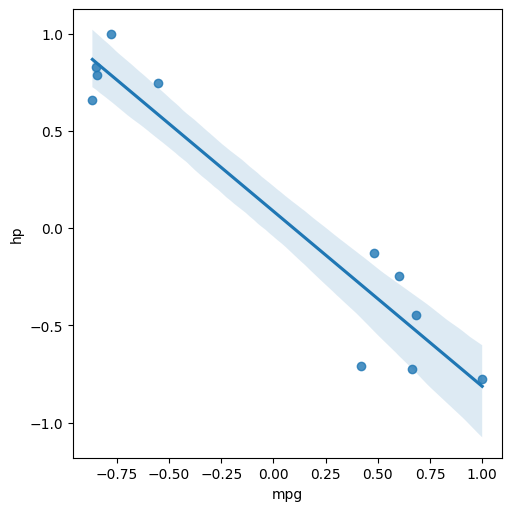

In [23]:
#mpg, hp
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.regplot(x="mpg", y="hp", data=a, ax=ax)

<Axes: xlabel='hp', ylabel='cyl'>

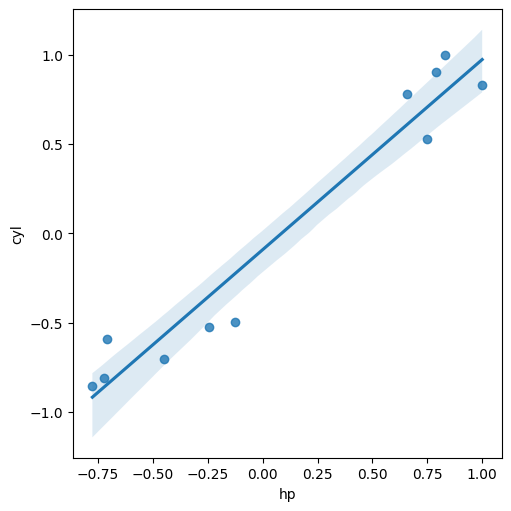

In [24]:
#hp, cyl
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
sns.regplot(x="hp", y="cyl", data=a, ax=ax)